In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/traffic.csv")
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
import os
os.getcwd()


'c:\\Users\\harsh\\OneDrive\\Desktop\\smart-traffic-time-series-ml\\notebooks'

In [3]:
os.listdir("..")



['.git',
 '.gitignore',
 '.venv',
 'dashboard',
 'data',
 'notebooks',
 'README.md',
 'report',
 'results',
 'src']

In [4]:
import os
os.getcwd()


'c:\\Users\\harsh\\OneDrive\\Desktop\\smart-traffic-time-series-ml\\notebooks'

In [5]:
import os
os.listdir("..")


['.git',
 '.gitignore',
 '.venv',
 'dashboard',
 'data',
 'notebooks',
 'README.md',
 'report',
 'results',
 'src']

In [6]:
import os
os.listdir("../data")


['processed', 'raw']

In [7]:
import os
os.listdir("../data/raw")


['.gitkeep', 'traffic.csv']

In [8]:
import pandas as pd

df = pd.read_csv("../data/raw/traffic.csv")
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [9]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.sort_values('date_time')
df = df.set_index('date_time')

df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [10]:
df.index


DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=48204, freq=None)

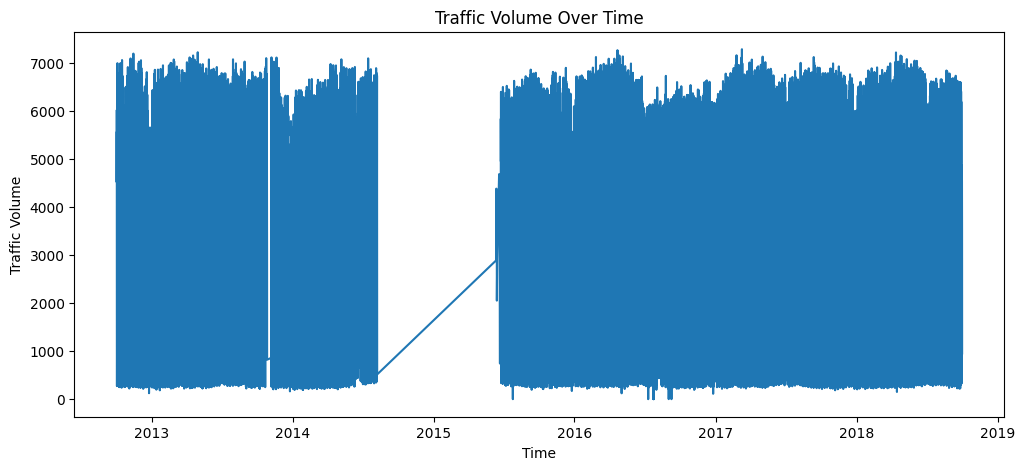

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df['traffic_volume'])
plt.title("Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.show()


In [12]:
ts = df[['traffic_volume']].copy()
ts.head()


,traffic_volume
date_time,
2012-10-02 09:00:00,5545
2012-10-02 10:00:00,4516
2012-10-02 11:00:00,4767
2012-10-02 12:00:00,5026
2012-10-02 13:00:00,4918


In [13]:
ts.isna().sum()


traffic_volume    0
dtype: int64

In [14]:
ts = ts.fillna(method='ffill')
ts.isna().sum()


C:\Users\harsh\AppData\Local\Temp\ipykernel_27000\11642741.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = ts.fillna(method='ffill')


traffic_volume    0
dtype: int64

In [15]:
train_size = int(len(ts) * 0.8)

train = ts.iloc[:train_size]
test  = ts.iloc[train_size:]

print("Train:", train.shape)
print("Test :", test.shape)


Train: (38563, 1)
Test : (9641, 1)


In [16]:
test = test.copy()
test['naive_pred'] = train['traffic_volume'].iloc[-1]
test.head()


,traffic_volume,naive_pred
date_time,,
2017-11-01 20:00:00,2704,2704
2017-11-01 20:00:00,2704,2704
2017-11-01 21:00:00,2204,2704
2017-11-01 21:00:00,2204,2704
2017-11-01 22:00:00,1713,2704


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae  = mean_absolute_error(test['traffic_volume'], test['naive_pred'])
rmse = np.sqrt(mean_squared_error(test['traffic_volume'], test['naive_pred']))

print("Baseline MAE :", mae)
print("Baseline RMSE:", rmse)


Baseline MAE : 1793.9001140960481
Baseline RMSE: 2043.4497343521766


In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train['traffic_volume'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -25.389677278621726
p-value: 0.0


In [19]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['traffic_volume'], order=(1, 0, 1))
model_fit = model.fit()

print(model_fit.summary())


c:\Users\harsh\OneDrive\Desktop\smart-traffic-time-series-ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harsh\OneDrive\Desktop\smart-traffic-time-series-ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harsh\OneDrive\Desktop\smart-traffic-time-series-ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                38563
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -310459.568
Date:                Mon, 19 Jan 2026   AIC                         620927.136
Time:                        23:55:43   BIC                         620961.376
Sample:                             0   HQIC                        620937.992
                              - 38563                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3260.9422     42.717     76.339      0.000    3177.219    3344.665
ar.L1          0.8552      0.004    241.021      0.000       0.848       0.862
ma.L1          0.4025      0.003    127.249      0.0

In [20]:
forecast = model_fit.forecast(steps=len(test))
test = test.copy()
test['arima_pred'] = forecast.values

test.head()




c:\Users\harsh\OneDrive\Desktop\smart-traffic-time-series-ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\harsh\OneDrive\Desktop\smart-traffic-time-series-ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,traffic_volume,naive_pred,arima_pred
date_time,,,
2017-11-01 20:00:00,2704,2704,2668.854574
2017-11-01 20:00:00,2704,2704,2754.581837
2017-11-01 21:00:00,2204,2704,2827.896809
2017-11-01 21:00:00,2204,2704,2890.596642
2017-11-01 22:00:00,1713,2704,2944.218282


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

arima_mae  = mean_absolute_error(test['traffic_volume'], test['arima_pred'])
arima_rmse = np.sqrt(mean_squared_error(test['traffic_volume'], test['arima_pred']))

print("ARIMA MAE :", arima_mae)
print("ARIMA RMSE:", arima_rmse)


ARIMA MAE : 1722.2055598011489
ARIMA RMSE: 1967.4469328772582


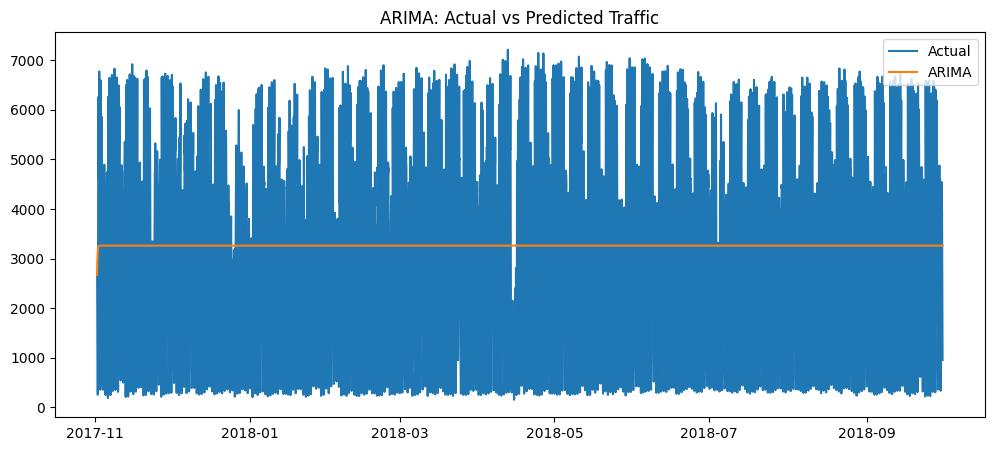

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test.index, test['traffic_volume'], label='Actual')
plt.plot(test.index, test['arima_pred'], label='ARIMA')
plt.legend()
plt.title("ARIMA: Actual vs Predicted Traffic")
plt.show()
